In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_excel(r"C:\Users\Shaurya\Desktop\Top Crypto historical prices\BTC.xlsx",index_col="Date",parse_dates=["Date"])

In [3]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-08-03,327.40,399.00,435.00,302.10,187.93K,-0.1794
2017-08-04,220.61,327.40,354.00,220.50,355.74K,-0.3262
2017-08-05,210.00,220.61,277.45,194.66,330.68K,-0.0481
2017-08-06,217.75,210.00,222.99,190.10,292.11K,0.0369
2017-08-07,320.00,217.75,370.00,215.00,934.70K,0.4696


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1375 entries, 2017-08-03 to 2021-05-08
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1375 non-null   float64
 1   Open      1375 non-null   float64
 2   High      1375 non-null   float64
 3   Low       1375 non-null   float64
 4   Vol.      1375 non-null   object 
 5   Change %  1375 non-null   float64
dtypes: float64(5), object(1)
memory usage: 75.2+ KB


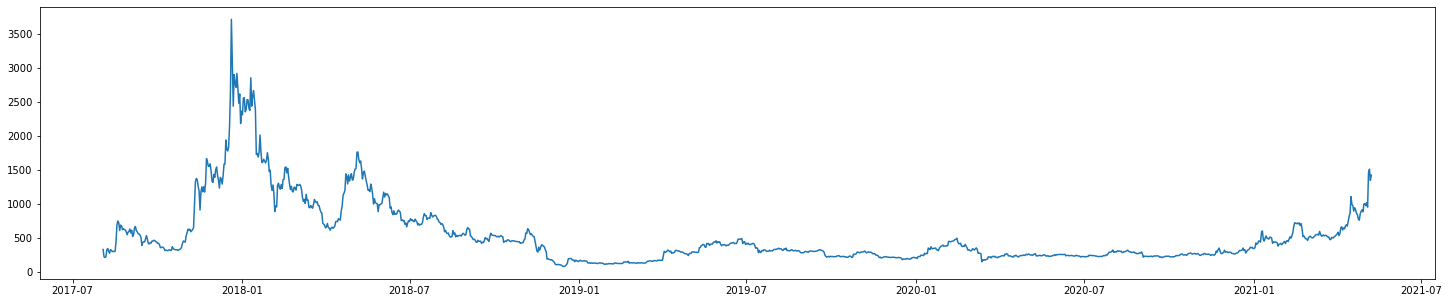

In [5]:
plt.figure(figsize=(25,5))
plt.plot(df["Price"])

In [6]:
ts = df["Price"]

In [7]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Value):
    result=adfuller(Value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [8]:
adfuller_test(ts)

ADF Test Statistic : -2.5223044252665154
p-value : 0.11014130063541755
#Lags Used : 21
Number of Observations Used : 1353
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [9]:
ts_log = np.log(ts)

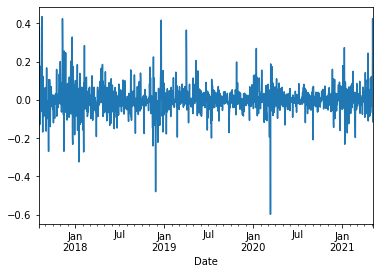

In [10]:
ts_log_diff = ts_log - ts_log.shift(1)
ts_log_diff.dropna().plot()

In [11]:
ts_log_diff = ts_log_diff.dropna()

In [12]:
adfuller_test(ts_log_diff)

ADF Test Statistic : -36.00587612007835
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1373
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


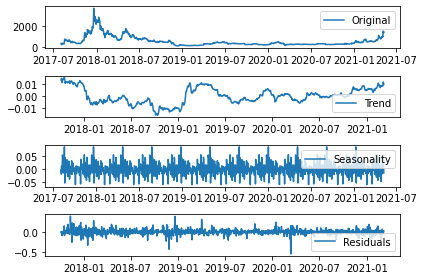

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_diff,period=124)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

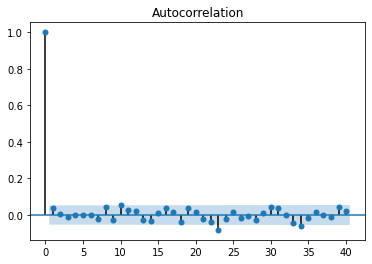

In [18]:
ACF = plot_acf(ts_log_diff,lags=40)

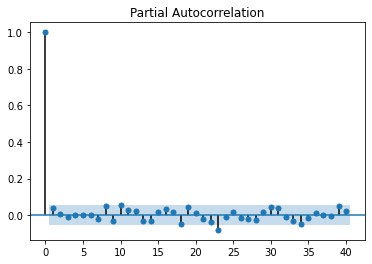

In [19]:
PACF = plot_pacf(ts_log_diff,lags=40)

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
model = ARIMA(ts, order=(23,1,0))
result = model.fit(disp=0)
print(result.summary())

C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 1374
Model:                ARIMA(23, 1, 0)   Log Likelihood               -7780.439
Method:                       css-mle   S.D. of innovations             69.648
Date:                Mon, 10 May 2021   AIC                          15610.878
Time:                        21:58:16   BIC                          15741.515
Sample:                    08-04-2017   HQIC                         15659.759
                         - 05-08-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8759      1.856      0.472      0.637      -2.762       4.514
ar.L1.D.Price     -0.0044      0.027     -0.162      0.871      -0.057       0.049
ar.L2.D.Price     -0.1544      0.027

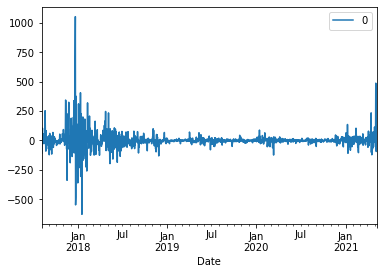

In [21]:
# plot residual errors
residuals = pd.DataFrame(result.resid)
residuals.plot()
pyplot.show()

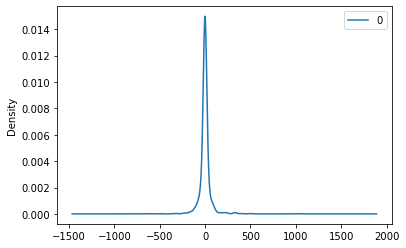

                 0
count  1374.000000
mean     -0.052969
std      69.691898
min    -626.564510
25%     -12.192179
50%      -1.197986
75%       9.762937
max    1051.094603


In [22]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

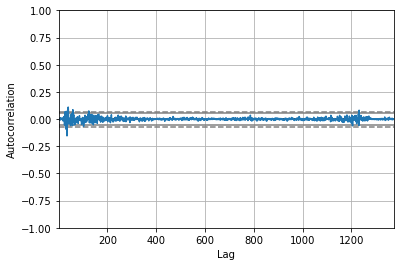

In [23]:
from pandas.plotting import autocorrelation_plot
#Residual autocorrelation plot
autocorrelation_plot(residuals)
pyplot.show()

In [24]:
prediction2 = pd.Series(result.fittedvalues,copy=True)

In [25]:
prediction2

Date
2017-08-04     0.875893
2017-08-05     3.605253
2017-08-06    15.842670
2017-08-07    -2.766234
2017-08-08    10.666058
                ...    
2021-05-04   -10.520891
2021-05-05    15.689030
2021-05-06     4.208077
2021-05-07   -71.622147
2021-05-08    11.719436
Length: 1374, dtype: float64

In [26]:
#convert to cumulative sum
prediction2_sum = prediction2.cumsum()
print(prediction2_sum)

Date
2017-08-04       0.875893
2017-08-05       4.481145
2017-08-06      20.323815
2017-08-07      17.557581
2017-08-08      28.223639
                 ...     
2021-05-04    1204.655585
2021-05-05    1220.344616
2021-05-06    1224.552692
2021-05-07    1152.930545
2021-05-08    1164.649981
Length: 1374, dtype: float64


In [27]:
prediction2_sum_log = pd.Series(ts_log, index=ts_log.index)
prediction2_sum_log = prediction2_sum_log.add(prediction2_sum,fill_value=0)
prediction2_sum_log.head()

Date
2017-08-03     5.791183
2017-08-04     6.272289
2017-08-05     9.828253
2017-08-06    25.707163
2017-08-07    23.325902
dtype: float64

In [29]:
predictions_ARIMA=np.exp(prediction2_sum_log)

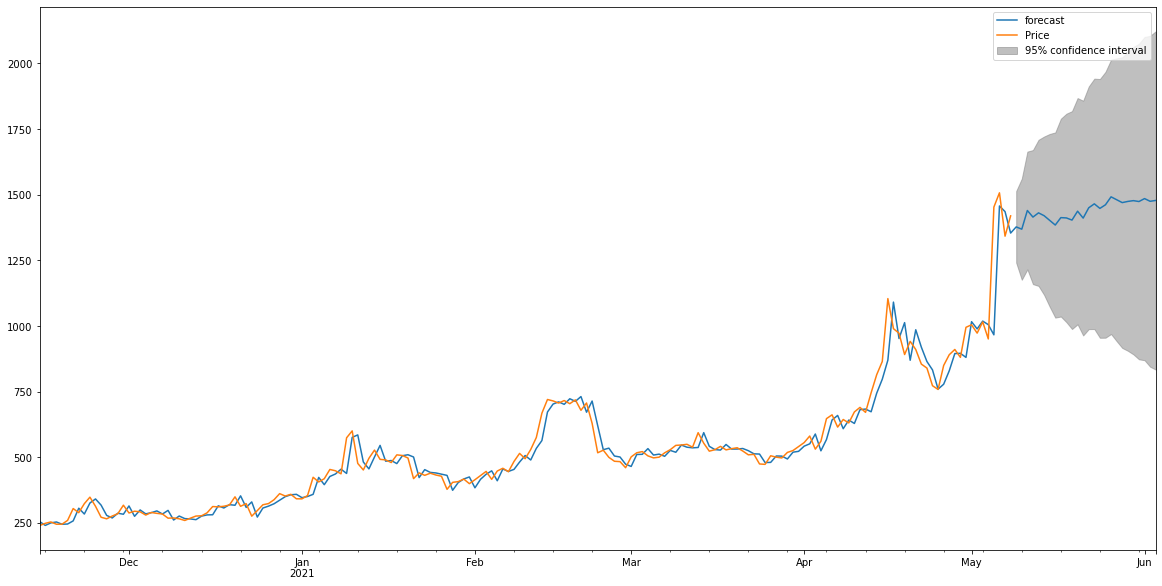

In [35]:
rcParams['figure.figsize']=20,10
result.plot_predict(1200,1400)
x=result.forecast(steps=120)